In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [2]:
original_dataset = pd.read_csv('Datasets/malaria-mosquito/Africa_Vectors_database_1898-2016_cluster.csv', encoding='utf-8', sep=';')

derivate_dataset = original_dataset.loc[original_dataset['YeStart'] == original_dataset['YeEnd']]
derivate_dataset = derivate_dataset.loc[(derivate_dataset['YeStart'] >= 2000) & (derivate_dataset['YeEnd'] <= 2014)]

In [3]:
df = derivate_dataset
#df.reset_index(drop=True)

X = df.iloc[:, 9:35]
y = df.iloc[:, 8]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

rf = RandomForestClassifier(n_estimators=100, bootstrap = True, max_features = 'sqrt')
rf = rf.fit(X_train, y_train)

In [4]:
y_pred = rf.predict(X_test)

errors = abs(y_pred - y_test)

#print('Mean Absolute Error:', round(np.mean(errors), 2)
      
m = 100 * (errors / y_test)
accuracy = 100 - np.mean(m)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.86 %.


[('An arabiensis', 0.16), ('SS S Form (savanah or Bamako forms)', 0.12), ('An gambiae ss', 0.11), ('An funestus  s.l', 0.08), ('SS M Form (An colluzzi or Mopti forms)', 0.06), ('An pharoensis', 0.06), ('An rufipes', 0.05), ('An. melas', 0.04), ('An funestus s.s. (specified)', 0.04), ('An coustani s.l', 0.04), ('An. merus', 0.03), ('An nili s.l', 0.03), ('An squamous', 0.03), ('An ziemanni ', 0.03), ('An gambiae_complex', 0.02), ('An rivulorum', 0.02), ('An moucheti s.l', 0.02), ('An mascarensis', 0.02), ('An leesoni', 0.01), ('An hancocki', 0.01), ('An wellcomei', 0.01), ('An paludis ', 0.01), ('An bwambae', 0.0), ('An parensis', 0.0), ('An vaneedeni', 0.0), ('An marshalli', 0.0)]


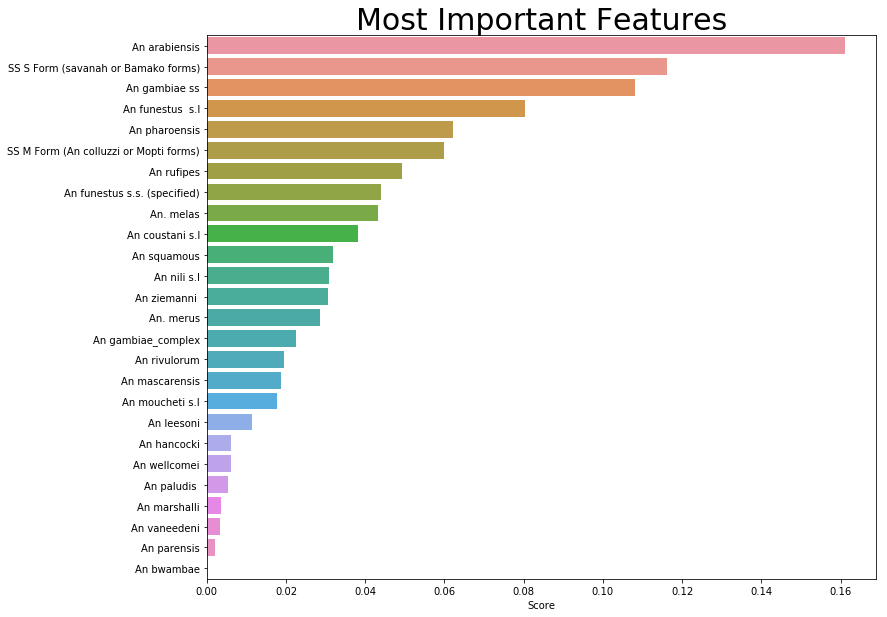

In [5]:
feature_list = X.columns

importances = list(rf.feature_importances_)

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

print(feature_importances)
df = pd.DataFrame(feature_importances)
df.to_csv('feature_rf.csv', sep = ';')

feature_series = pd.Series(rf.feature_importances_,index=feature_list).sort_values(ascending=False)

feat = plt.figure(figsize = (12,10))
sns.barplot(x = feature_series, y = feature_series.index)
plt.xlabel('Score')
plt.title('Most Important Features', fontsize = 30)
plt.savefig('rf_imp.png')
plt.show()

In [6]:
score = rf.score(X_train ,y_train)

print('coefficient of determination R² of the prediction: ', score)
print('mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
print('test variance score: %.2f' % r2_score(y_test, y_pred))

coefficient of determination R² of the prediction:  0.46877054569362264
mean squared error: 19.83
test variance score: -0.44


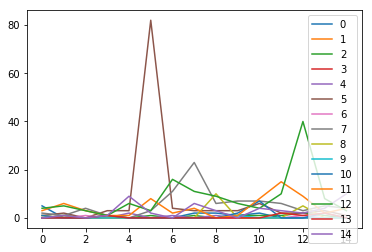

In [7]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm)

df_cm.plot()

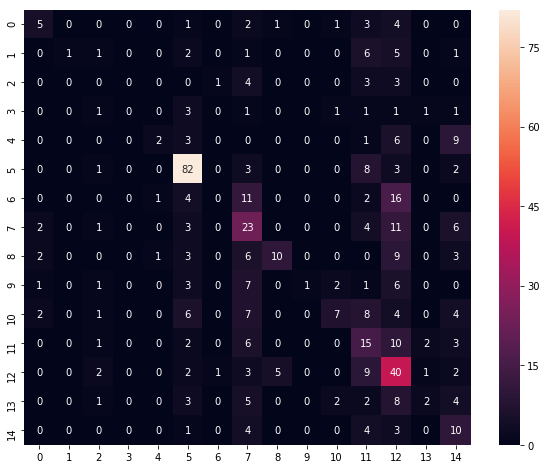

In [8]:
feat = plt.figure(figsize = (10,8))
sns.heatmap(df_cm, annot=True)
plt.savefig('rf_conf_matrix.png')